# Query on BigQuery
```
SELECT * 
FROM `ftds-hacktiv8-project.phase1_ftds_016_rmt.credit-card-information`
WHERE MOD(CUST_ID ,2)= 0
```

# 1. Perkenalan 
- Nama  : Muhammad Julizar
- Batch : FTDS-RMT-016


## Dataset  : Credit-Card-Information
## Objektif : Membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank.

# 2. Import Library

In [1]:
# Library for process
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score




# 3. Data Loading

In [2]:
# Loading Data
df = pd.read_csv('D:\Hacktiv 8\Full time Data Science\Phase 1\Graded_Challange\Graded_challange4\h8dsft_P1G4_muhammad_julizar.csv')

In [3]:
# Melihat top 5 data
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8


In [4]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [5]:
# Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


# 4. EDA (Exploratory Data Analysisi)

In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8


In [8]:
# Melihat missing Value
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot: >

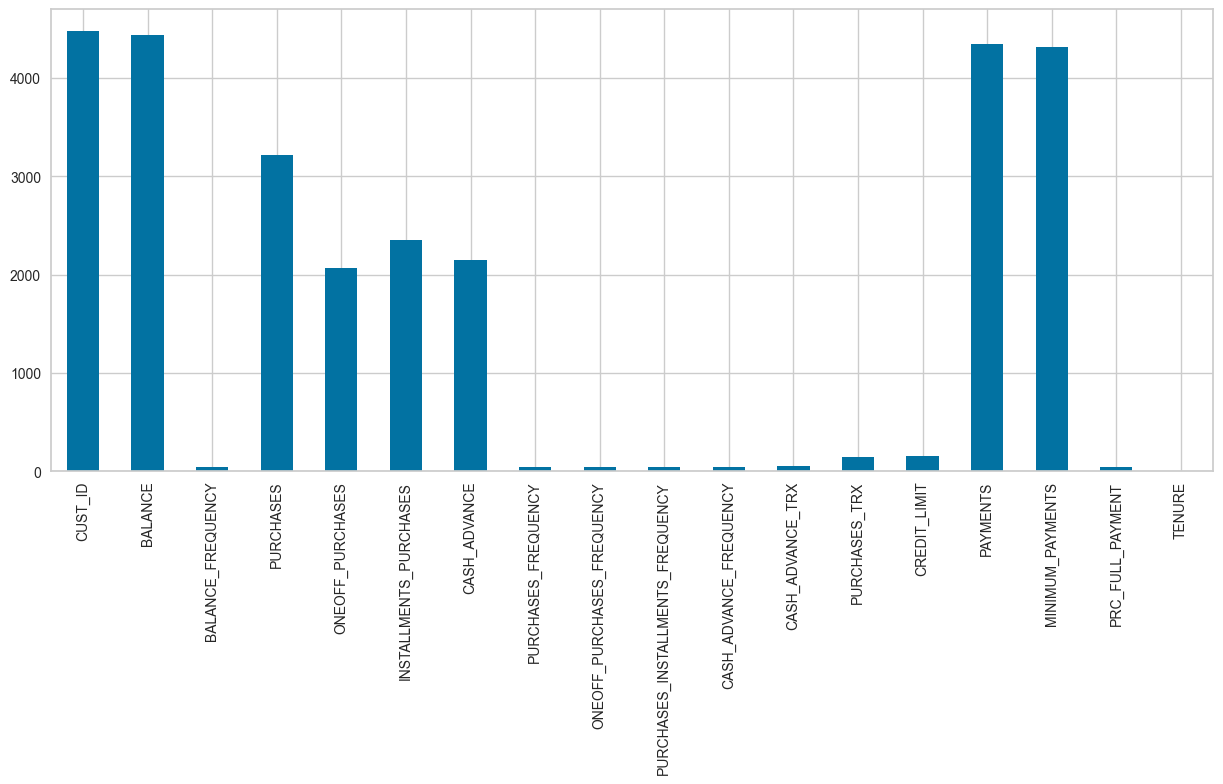

In [9]:
# Melihat jumlah unique Value pada data
df.nunique().plot(kind='bar', figsize=(15,6))

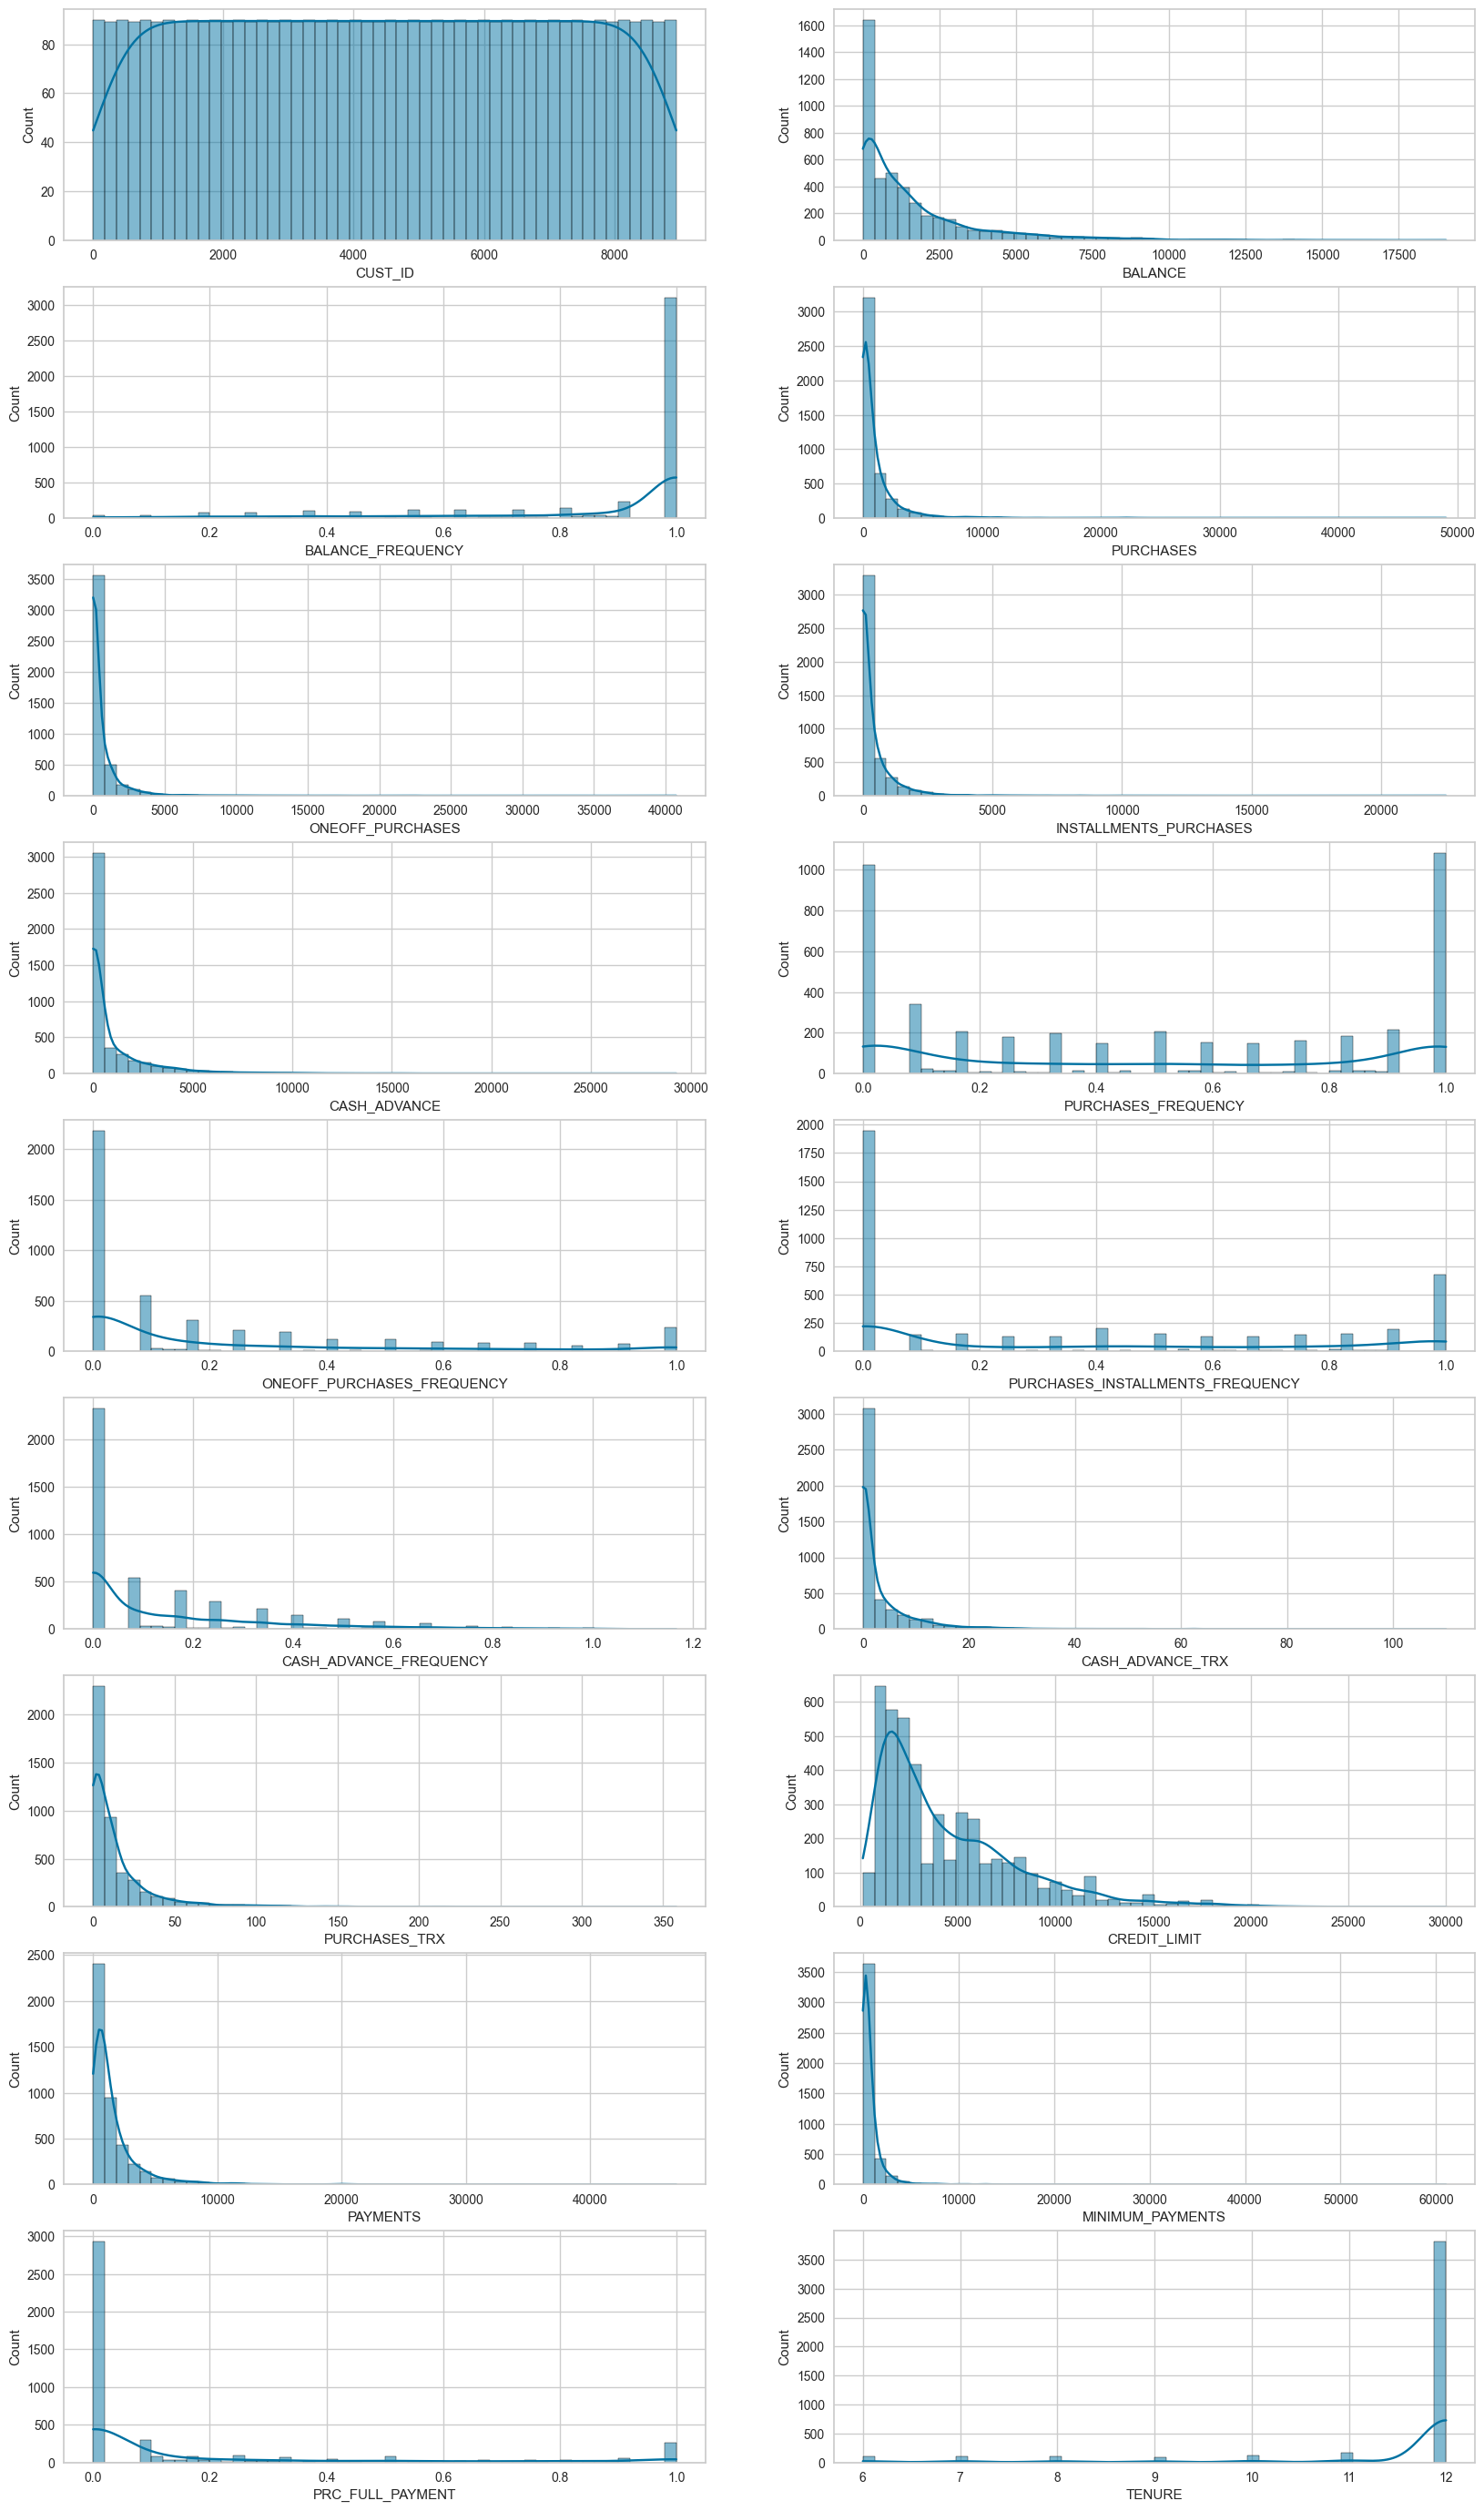

In [10]:
# Melihat distibusi data keseluruhan kolom
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.histplot(df[col], ax=ax, kde=True, bins=50)
        plt.xlabel(col)
        
plt.show()

In [11]:
# melihat skewness data
df.skew()

CUST_ID                              0.000000
BALANCE                              2.456621
BALANCE_FREQUENCY                   -2.020309
PURCHASES                            8.987052
ONEOFF_PURCHASES                    10.140059
INSTALLMENTS_PURCHASES               8.116887
CASH_ADVANCE                         4.739678
PURCHASES_FREQUENCY                  0.061598
ONEOFF_PURCHASES_FREQUENCY           1.523455
PURCHASES_INSTALLMENTS_FREQUENCY     0.510288
CASH_ADVANCE_FREQUENCY               1.823380
CASH_ADVANCE_TRX                     4.752780
PURCHASES_TRX                        4.480452
CREDIT_LIMIT                         1.545078
PAYMENTS                             6.040773
MINIMUM_PAYMENTS                    12.357860
PRC_FULL_PAYMENT                     1.911650
TENURE                              -2.932822
dtype: float64

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_17868\3630294824.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


Text(0.5, 0, 'PAYMENTS')

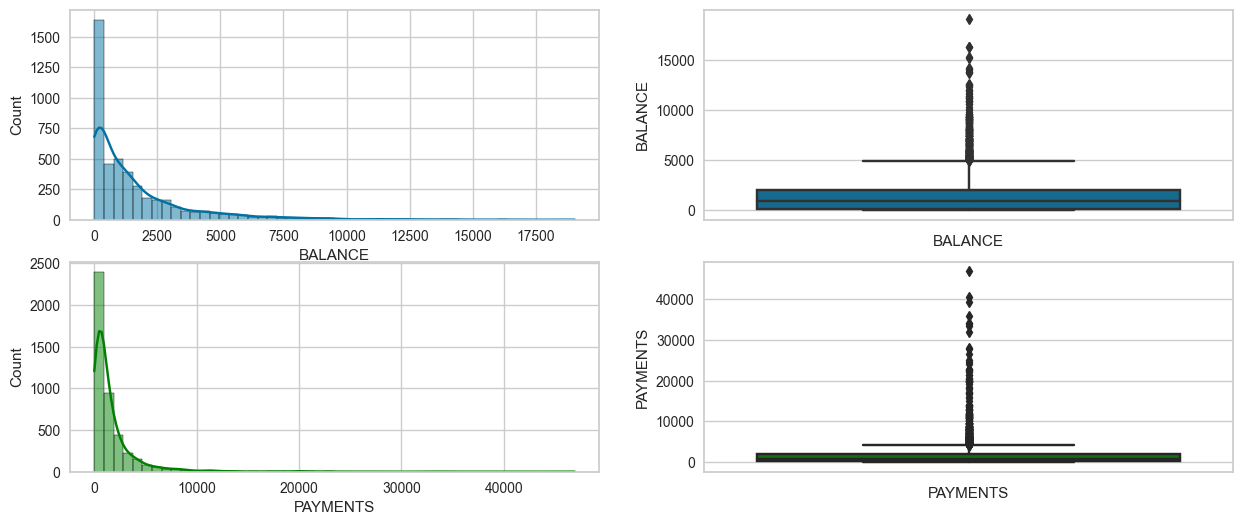

In [12]:
# memplot 2 kolom yaitu balance dan payments

plt.subplots(figsize=(15,6))

plt.subplot(2,2,1)
sns.histplot(df['BALANCE'], kde=True, bins=50)
plt.xlabel('BALANCE')

plt.subplot(2,2,2)
sns.boxplot(df,y=df['BALANCE'])
plt.xlabel('BALANCE')

plt.subplot(2,2,3)
sns.histplot(df['PAYMENTS'], kde=True, bins=50, color='green')
plt.xlabel('PAYMENTS')

plt.subplot(2,2,4)
sns.boxplot(df,y=df['PAYMENTS'], color='green')
plt.xlabel('PAYMENTS')



Meskipn lebih banyak orang yang memiliki balance mendekati 0 dan melakukan payment mendekati 0, namun tidak sedikit jg orang yang memiliki balance tinggi dan payment yang besar jika kita lihat dari box plot

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_17868\3329718093.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<AxesSubplot: xlabel='PAYMENTS', ylabel='BALANCE'>

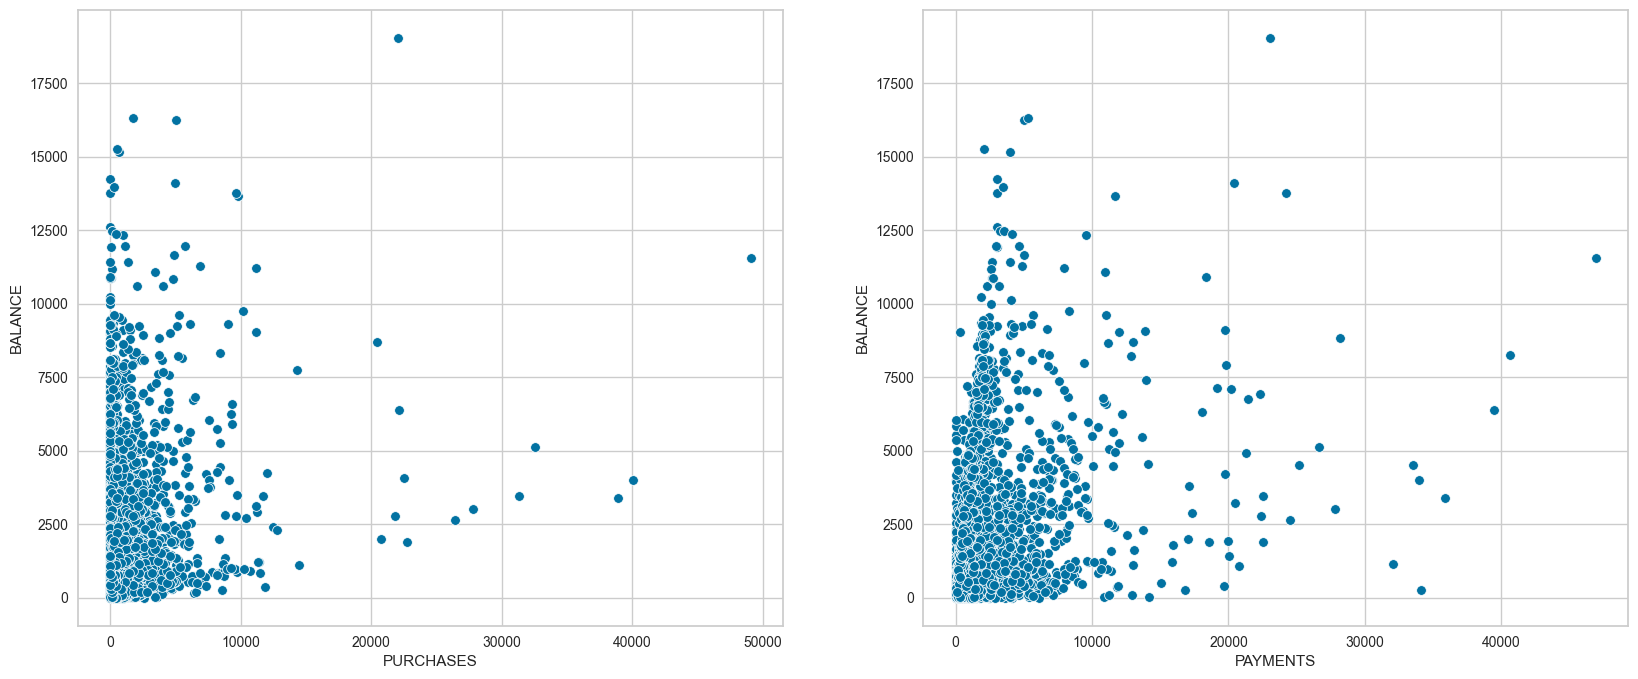

In [13]:
# Melihat scatter plot balance dan payments
plt.subplots(figsize=(20,8))


plt.subplot(1,2,1)
sns.scatterplot(df, y=df['BALANCE'],  x=df['PURCHASES'])

plt.subplot(1,2,2)
sns.scatterplot(df, y=df['BALANCE'],  x=df['PAYMENTS'])

Dengan nilai purchases yang tinggi, sedikit sekali user credit card melakukan cash_advance/berhutang, hal ini baik utk user demi menjaga keuangan yang dimiliki dan menghindari dari hutang

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_17868\1260033329.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


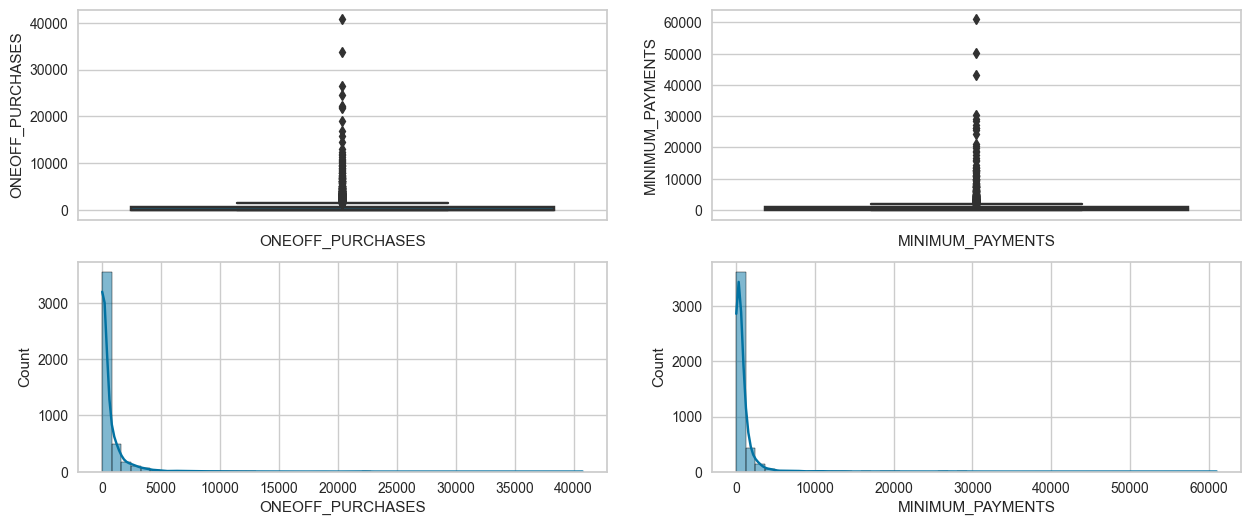

In [14]:
# melihat distribusi data yang memiliki skewness paling ekstreme
plt.subplots(figsize=(15,6))

plt.subplot(2,2,1)
sns.boxplot(df, y=df['ONEOFF_PURCHASES'])
plt.xlabel('ONEOFF_PURCHASES')

plt.subplot(2,2,2)
sns.boxplot(df,y=df['MINIMUM_PAYMENTS'])
plt.xlabel('MINIMUM_PAYMENTS')

plt.subplot(2,2,3)
sns.histplot(df['ONEOFF_PURCHASES'], kde=True, bins=50)

plt.subplot(2,2,4)
sns.histplot(df['MINIMUM_PAYMENTS'], kde=True, bins=50)

plt.show()

Terdapat 2 kolom yang memiliki extreme skewed, yaitu ONEOFF_PURCHASES, MINIMUM_PAYMENTS

# 5. Data Preprocessing

Menurut saya kolom CUST_ID tidak perlu digunakan, sehingga harus didrrop

In [15]:
# Menghapus kolom cust_id
df= df.drop(columns={'CUST_ID'})

In [16]:
# membuat 25 sample untuk data inference
df_inf = df.sample(25, random_state=25)
df_train = df.drop(df_inf.index)
df_train.reset_index(drop=True, inplace=True)

## 5.1 Handling Missing Value

In [17]:
# memeriksa data yang missing
df_train.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    156
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

there is missing value in credit limit and minimum payment column, so we have to check the distribution to decide what we gonna do to this column.

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_17868\4293991431.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


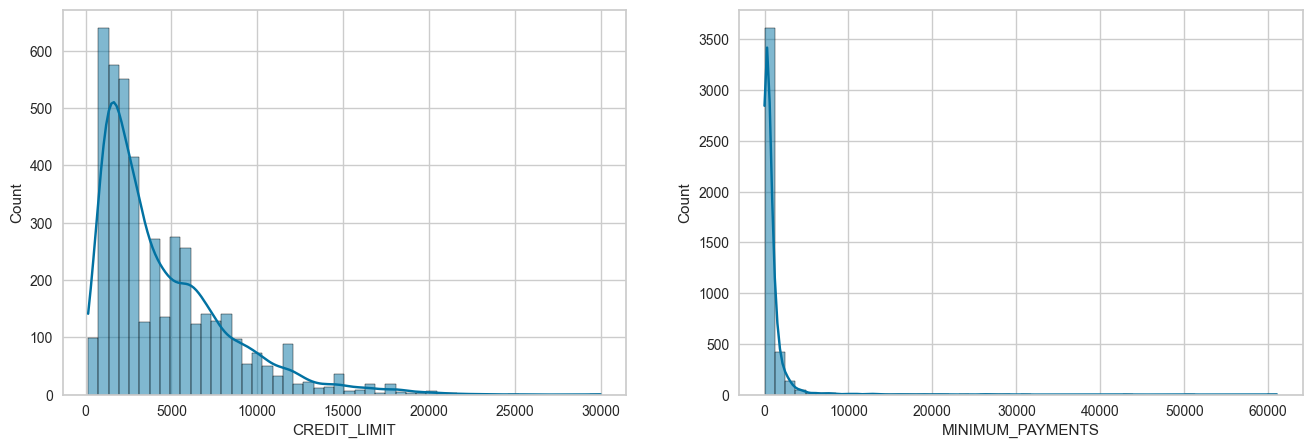

In [18]:
# melihat distribusi data 2 kolom yang terdapat missing value
plt.subplots(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df_train['CREDIT_LIMIT'], kde=True, bins=50)

plt.subplot(1,2,2)
sns.histplot(df_train['MINIMUM_PAYMENTS'], kde=True, bins=50)

plt.show()

Dari 2 kolom diatas yang terdapat missing value, memiliki distribusi yang tidak normal atau skewed, sehingga perlu dilakukan `median` imputation 

In [19]:
# Imputation Data
df_train['MINIMUM_PAYMENTS'] = df_train['MINIMUM_PAYMENTS'].fillna(df_train['MINIMUM_PAYMENTS'].median())
df_train['CREDIT_LIMIT'] = df_train['CREDIT_LIMIT'].fillna(df_train['CREDIT_LIMIT'].median())

In [20]:
#memeriksa kembali missing value 
df_train.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Setelah dilakukan imputation sudah tidak terdapat lagi missing value\

In [21]:
# menghapus kolom categorical
categorical = ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE']
df_numeric= df_train.drop(columns=categorical)
df_numeric.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,16.581535,200.0,0.0,200.0,0.0,0,2,1200.0,0.000000,309.816334,0.0
1,943.584041,103.0,103.0,0.0,0.0,0,1,1000.0,215.325023,410.484825,0.0
2,1.979916,80.0,80.0,0.0,0.0,0,1,1500.0,0.000000,309.816334,0.0
3,461.455720,585.0,585.0,0.0,0.0,0,1,1000.0,258.032630,151.696433,0.0
4,1053.594730,1450.0,1450.0,0.0,0.0,0,1,1500.0,397.090516,227.143184,0.0


## 5.2 Handling Outliers

In [22]:
# melihat kembali skewness
df_numeric.skew()

BALANCE                    2.460047
PURCHASES                  8.974892
ONEOFF_PURCHASES          10.127349
INSTALLMENTS_PURCHASES     8.103608
CASH_ADVANCE               4.757496
CASH_ADVANCE_TRX           4.756177
PURCHASES_TRX              4.471621
CREDIT_LIMIT               1.549300
PAYMENTS                   6.039447
MINIMUM_PAYMENTS          12.567388
PRC_FULL_PAYMENT           1.905321
dtype: float64

In [23]:
# membuat nama kolom numerical kedalam list
numeric_list = df_numeric.columns.to_list()

In [24]:
# mengatasi outlier dengan winsorizer 
winsorize = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=numeric_list)
winsorize.fit(df_numeric)
df_no_outlier = winsorize.fit_transform(df_numeric)

Alasan pemilihan winsorizer agar tidak terjadi banyaknya penghapusan data, agar informasi tidak banyak menghilang

In [25]:
# melihat kembali skewness
df_no_outlier.skew()

BALANCE                   1.163397
PURCHASES                 1.204966
ONEOFF_PURCHASES          1.229645
INSTALLMENTS_PURCHASES    1.225813
CASH_ADVANCE              1.265409
CASH_ADVANCE_TRX          1.287758
PURCHASES_TRX             1.142857
CREDIT_LIMIT              1.009371
PAYMENTS                  1.140535
MINIMUM_PAYMENTS          1.181764
PRC_FULL_PAYMENT          1.266646
dtype: float64

Setelah dihandle outlier menggunakan winsorizeer tetap saja masih banyak data yang skewed, namun tidak se ekstrem sebelumnya

In [26]:
# melihat top5 data
df_no_outlier.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,16.581535,200.0,0.0,200.0,0.0,0,2,1200.0,0.000000,309.816334,0.0
1,943.584041,103.0,103.0,0.0,0.0,0,1,1000.0,215.325023,410.484825,0.0
2,1.979916,80.0,80.0,0.0,0.0,0,1,1500.0,0.000000,309.816334,0.0
3,461.455720,585.0,585.0,0.0,0.0,0,1,1000.0,258.032630,151.696433,0.0
4,1053.594730,1450.0,1450.0,0.0,0.0,0,1,1500.0,397.090516,227.143184,0.0


## 5.3 Scalling

Dikarenakan skewness dari seluruh kolom mellebih > 0.5 maka harus dilakukan normalized scalling, sehingga scaler yang digunakan adalah `MinMaxScaler`

In [27]:
# Scalling data
normalized= MinMaxScaler()
df_scaler = normalized.fit_transform(df_no_outlier)

In [28]:
# make data frame
df_scalled = pd.DataFrame(df_scaler, columns=df_no_outlier.columns)

## 5.4 Find VIF score

In [29]:
# mencari nilai VIF
vif = pd.DataFrame()
vif['variables'] = df_scalled.columns
vif['score_VIF'] = [variance_inflation_factor(df_scalled.values, i) for i in range(len(df_scalled.columns))]
vif

,variables,score_VIF
0,BALANCE,9.051447
1,PURCHASES,25.268942
2,ONEOFF_PURCHASES,11.987012
3,INSTALLMENTS_PURCHASES,8.965448
4,CASH_ADVANCE,4.940270
5,CASH_ADVANCE_TRX,4.142819
6,PURCHASES_TRX,6.089710
7,CREDIT_LIMIT,4.176842
8,PAYMENTS,4.174775
9,MINIMUM_PAYMENTS,6.504735


Dari score VIF diatas, kolom Purchases, OneOff_purchases, Balance dan installment purchases memiliki tingkat multicolinearity yang tinggi

In [30]:
# mengcopy data 
df_final = df_scalled.copy()

## 5.5 PCA

In [31]:
# PCA untuk mereduksi feature
pca = PCA()
pca.fit(df_final)



PCA()

### 5.5.1 Elbow Method

In [32]:
# mencari berapa feature yang dipakai dengan >=93% informasi
target_information = np.cumsum(pca.explained_variance_ratio_)
t = np.argmax(target_information >= 0.93) +1
t 

7

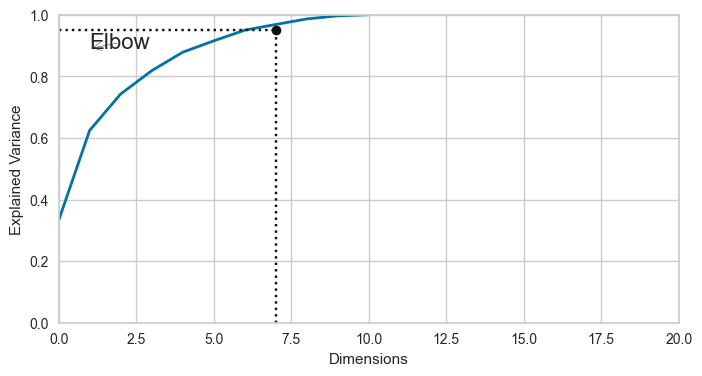

In [33]:
# memplot data kedalam elbow method
plt.figure(figsize=(8,4))
plt.plot(target_information, linewidth=2)
plt.axis([0, 20, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")


plt.plot([t, t], [0, 0.95], "k:")
plt.plot([0, t], [0.95, 0.95], "k:")
plt.plot(t, 0.95, "ko")
plt.annotate("Elbow", xy=(1, 0.89), xytext=(1, 0.89),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

### 5.5.2 Final components

From elbow method we can see that we can use 3 PC or 95% information

In [34]:
# Mereduksi feature df_final
pca_reduced = PCA(n_components = 0.93)
X_reduced = pca_reduced.fit_transform(df_final)

In [35]:
# membuat data frame berdasarkan PCA
X_reduced_df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
X_reduced_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.331345,-0.602852,-0.299864,0.068418,-0.096148,0.058812,0.040216
1,-0.405971,-0.491666,-0.338990,-0.038271,0.047961,-0.006936,0.109212
2,-0.402999,-0.612099,-0.304893,-0.071268,-0.022221,0.039484,0.041755
3,-0.168804,-0.498319,-0.354743,-0.337036,-0.062138,-0.004024,0.083530
4,0.219364,-0.236602,-0.486537,-0.735767,-0.035439,-0.154204,0.109713
...,...,...,...,...,...,...,...
4445,-0.691281,0.052623,0.378103,-0.137293,-0.353929,-0.051664,0.104904
4446,-0.611395,0.444866,0.725438,-0.225885,-0.229268,0.544398,0.234045
4447,-0.347889,0.885947,0.078037,-0.089784,-0.109441,-0.146343,-0.455721
4448,-0.012721,1.433517,0.058128,-0.458973,-0.082964,-0.815425,-0.114266


# 6. Model Definition

## 6.1 K-Means

In [36]:
kmeans = KMeans()

# 7. Model Training

## 7.1 K-Means

In [37]:
# mendefinisikan model KMeans
kmeans.fit(X_reduced)

KMeans()

# 8.  Model Evaluation

## 8.1 Kmeans for Find best n_clusters

### 8.1.1 Elbow Method

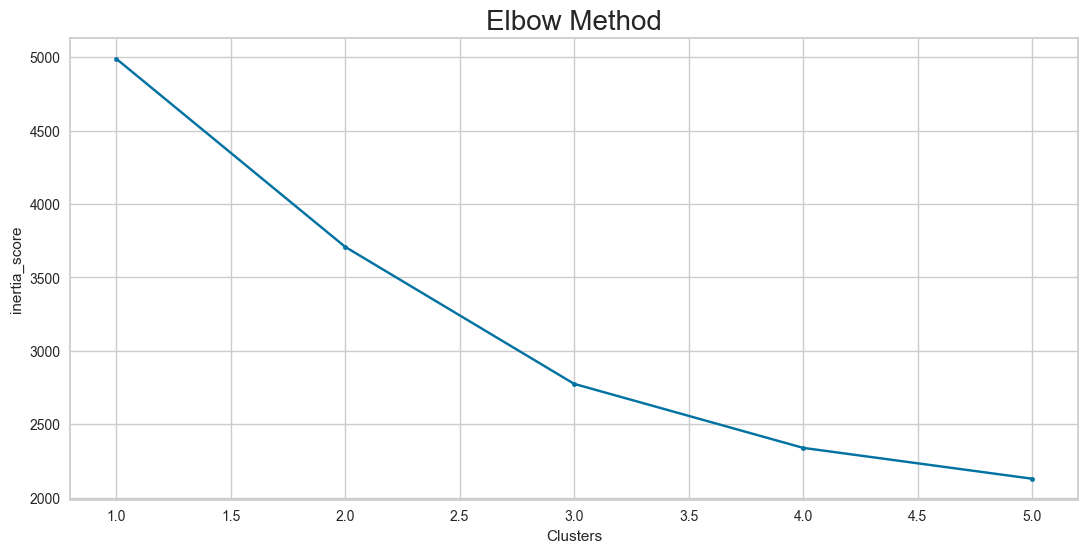

In [38]:
# Elbow method to find best n_clusters
inertia_score = []
for i in range(1, 6):
    km = KMeans(n_clusters = i, random_state = 7)
    km.fit(X_reduced)
    inertia_score.append(km.inertia_)

plt.figure(figsize=(13,6))
plt.plot(range(1, 6), inertia_score, marker =".")
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Clusters')
plt.ylabel('inertia_score')
plt.grid(True)
plt.show()

Dari elbow method cluster dengan jumlah 4 dan 3 adalah elbow terbaik, namun di case ini saya memilih cluster 3.<br> karena pada cluster 4 tidak mengalami penurunan yang signifikan

### 8.1.2 Shiloutte Score

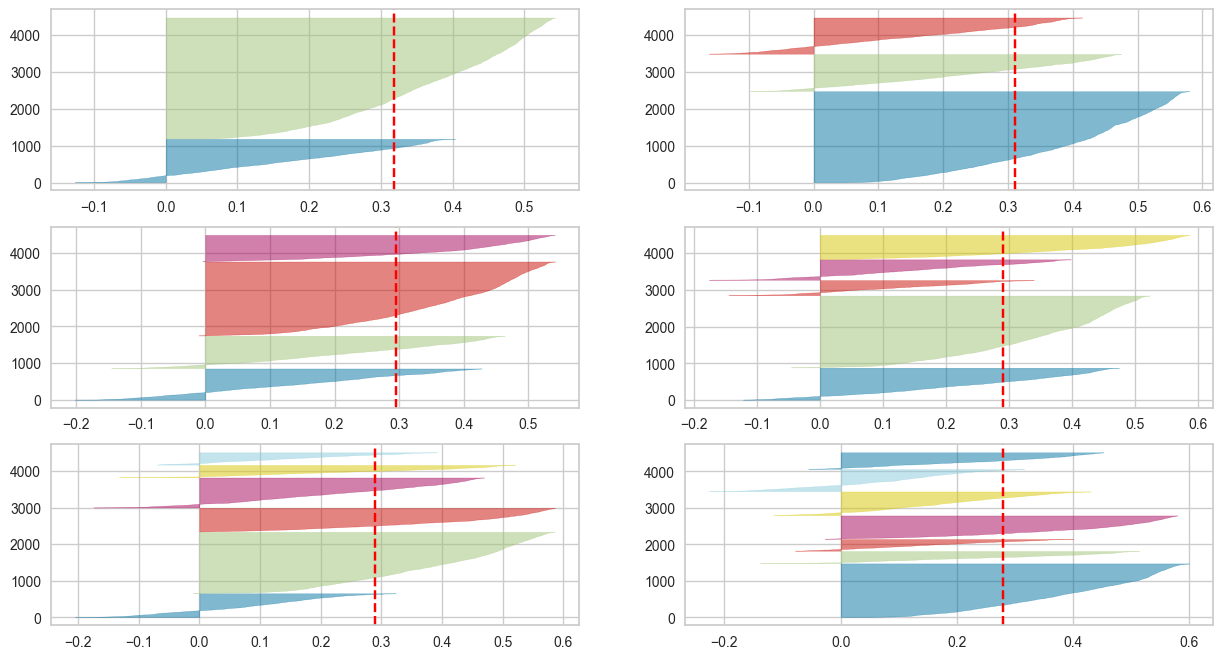

In [39]:
# Shilloute score to find the best n_clustres
fig, ax = plt.subplots(3, 2, figsize = (15,8))


for i in np.arange(2,8):
  km_shilloutte = KMeans(n_clusters = i, init="k-means++", n_init = 10, max_iter = 300, random_state = 42)
  q, mod = divmod(i,2)

  visualizer = SilhouetteVisualizer(km_shilloutte, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(X_reduced)

Dari grafik diatas dapat kita lihat bahwa shilloutte score terbaik adalah dengan menggunakan 3 cluster

### Dari kedua percobaan menggunakan shilloutte maupun elbow method kita menemukan cluster terbaik adalah 3 

## 8.2 Perbandingan menggunakan hasil cluster dengan PCA

### 8.2.1 Membuat 2 PC

In [40]:
# Making 2PCA 
pca_try = PCA(n_components = 2)
x = pca_try.fit_transform(df_final)
x= pd.DataFrame(x, columns=['pc1', 'pc2'])
x

,pc1,pc2
0,-0.331345,-0.602852
1,-0.405971,-0.491666
2,-0.402999,-0.612099
3,-0.168804,-0.498319
4,0.219364,-0.236602
...,...,...
4445,-0.691281,0.052623
4446,-0.611395,0.444866
4447,-0.347889,0.885947
4448,-0.012721,1.433517


dibuat 2 PCA untuk dilakukan clustering

### 8.2.2 Define kmeans

In [41]:
# melakukan clustering dengan KMeans
km_default = KMeans(n_clusters = 3, init="k-means++", n_init = 10, max_iter = 300, random_state = 42)
km_default.fit(X_reduced)


KMeans(n_clusters=3, random_state=42)

In [42]:
km_default.labels_

array([0, 0, 0, ..., 1, 1, 1])

#### 8.2.2.1 Visualize beetwen K-means and PCA

Text(0.5, 1.0, 'KMeans')

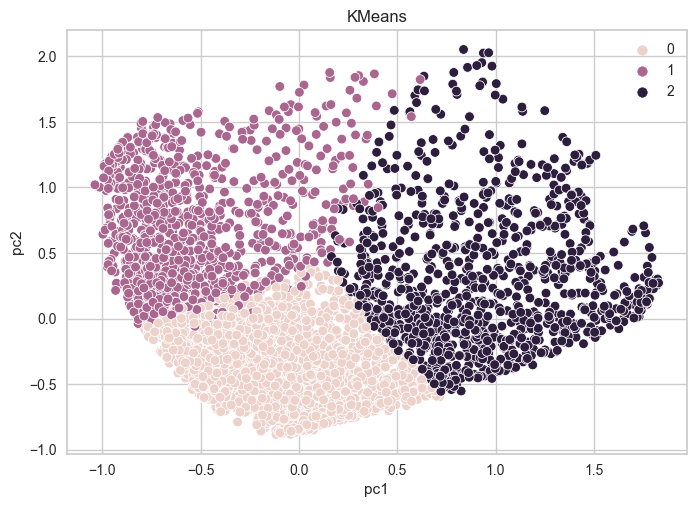

In [43]:
# Scatterplot the result
sns.scatterplot(x, x=x['pc1'], y=x['pc2'], hue=km_default.labels_)
plt.title('KMeans')

### 8.2.3 Define DBscan

In [44]:
# Clustering using DBScan
db = DBSCAN(eps=0.4, min_samples=27)
db.fit(X_reduced)


DBSCAN(eps=0.4, min_samples=27)

In [45]:
# DB Scan selallu mendapatkan cluster -1 
np.unique(db.labels_)

array([-1,  0,  1,  2], dtype=int64)

Didapatkan 4 cluster dengan -1 sebagai outlier

In [46]:
# Making data frame
label = pd.DataFrame(db.labels_, columns=['clusters'])

In [47]:
# Concat data dan menghapus cluster outlier
x_df = pd.concat([x,label], axis=1)
x_df_final = x_df[x_df['clusters'] > -1]
x_df_final.shape

(3407, 3)

In [48]:
# check cluster
x_df_final['clusters'].nunique()

3

#### 8.2.3.1 Visualize DBScan

Tanpa outlier

Text(0.5, 1.0, 'DBScan')

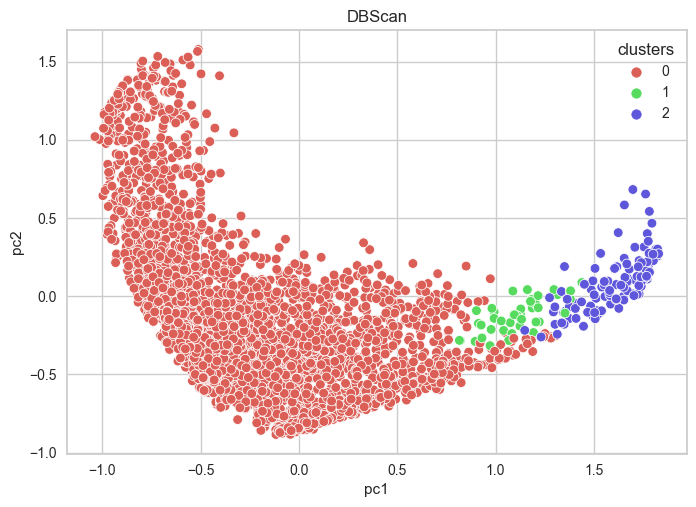

In [49]:
# scatter plot DBScan
sns.scatterplot(x_df_final, x=x_df_final['pc1'], y=x_df_final['pc2'], hue=x_df_final['clusters'],
                palette=sns.color_palette('hls',x_df_final['clusters'].nunique()))
plt.title('DBScan')

### 8.2.4 Define AgglomerativeClustering

In [50]:
# Clustering using agglomerative
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
hc.fit(X_reduced)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [51]:
# Banyaknya cluster 
np.unique(hc.labels_)

array([0, 1, 2], dtype=int64)

#### 8.2.4.1 Visualize AgglomerativeClustering

Text(0.5, 1.0, 'AgglomerativeClustering')

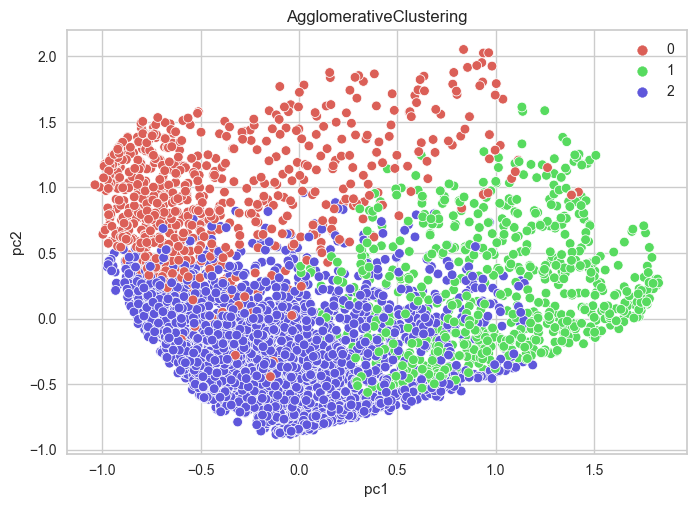

In [52]:
# visualize clustering result
sns.scatterplot(x, x=x['pc1'], y=x['pc2'], hue=hc.labels_, palette=sns.color_palette('hls', np.unique(hc.labels_).shape[0]))
plt.title('AgglomerativeClustering')

## 8.4 Perbandingan Cluster dengan EDA menggunakan KMeans

Alasan saya menggunakan KMeans adalah KMeans merupakan algoritma terbaik pada saat mencoba clustering dengan PCA

In [53]:
# copy data
df_cluster = df_no_outlier.copy()

In [54]:
# melihat 5 data teratas
df_cluster.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,16.581535,200.0,0.0,200.0,0.0,0,2,1200.0,0.000000,309.816334,0.0
1,943.584041,103.0,103.0,0.0,0.0,0,1,1000.0,215.325023,410.484825,0.0
2,1.979916,80.0,80.0,0.0,0.0,0,1,1500.0,0.000000,309.816334,0.0
3,461.455720,585.0,585.0,0.0,0.0,0,1,1000.0,258.032630,151.696433,0.0
4,1053.594730,1450.0,1450.0,0.0,0.0,0,1,1500.0,397.090516,227.143184,0.0


In [55]:
# Check VIF score
vif.sort_values(by='score_VIF', ascending=False)

,variables,score_VIF
1,PURCHASES,25.268942
2,ONEOFF_PURCHASES,11.987012
0,BALANCE,9.051447
3,INSTALLMENTS_PURCHASES,8.965448
9,MINIMUM_PAYMENTS,6.504735
6,PURCHASES_TRX,6.089710
4,CASH_ADVANCE,4.940270
7,CREDIT_LIMIT,4.176842
8,PAYMENTS,4.174775
5,CASH_ADVANCE_TRX,4.142819


Dari data VIF terlihat kolom purchases memiliki multicolinearity yg tinggi sehingga cocok untuk dilihat clusternya, saya akan membandingkan dengan BALANCE untuk melihat perilaku purchases user credit card berdasarkan banyaknya saldo yang dimiliki

In [56]:
# membuat kolom baru berdasarkan hasil cluster
df_cluster['clusters'] = km_default.labels_

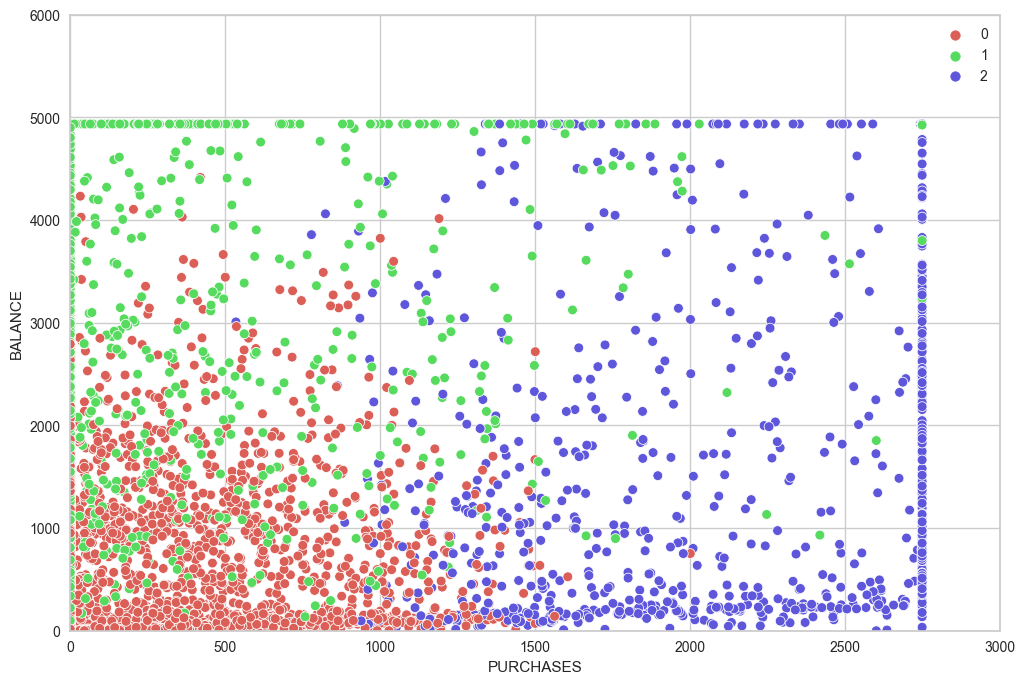

In [57]:
# Visualize result cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(df_cluster, x=df_cluster['PURCHASES'], y=df_cluster['BALANCE'], hue=df_cluster['clusters'], s=50,palette=sns.color_palette('hls',df_cluster['clusters'].nunique()))
plt.legend(loc='upper right')
plt.ylim((0,6000))
plt.xlim((0,3000))
plt.show()


Dari data terdapat 3 cluster terhadap perilaku pembelian berdasarkan saldo dari customer bank yang memegang kartu kredit:
1. Cluster 0 adalah Customer yang memiliki nilai saldo rendah hingga menengah dengan kebiasaan berbelanja cenderung rendah hingga menengah 
2. Cluster 1 adalah Customer yang memiliki saldo kartu kredit menegah hingga tinggi dengan kebiasaan berbelanja cenderung rendah - menengah
3. Cluster 2 adalah customer yang memiliki nilai saldo rendah hingga tinggi namun memiliki tingkat kebiasaan berbelanja yang tinggi

# 9. Model Inference

In [58]:
# Remove missing value in data inference
df_inf = df_inf.dropna()
df_inf


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
126,2196.006333,1.000000,666.89,550.79,116.10,0.000000,0.500000,0.250000,0.166667,0.000000,0,8,7500.0,579.257195,773.160428,0.000000,12
2280,328.686581,1.000000,2806.78,2588.53,218.25,0.000000,0.857143,0.714286,0.285714,0.000000,0,26,1200.0,1796.886852,93.017466,0.250000,7
1903,1258.769693,1.000000,142.00,42.00,100.00,0.000000,0.166667,0.083333,0.083333,0.000000,0,2,1200.0,300.672826,6720.689968,0.000000,12
2558,2173.621597,1.000000,200.00,200.00,0.00,201.404735,0.083333,0.083333,0.000000,0.250000,4,1,8000.0,495.968187,502.765453,0.000000,12
3205,45.785125,0.636364,12.00,0.00,12.00,166.160258,1.000000,0.000000,0.916667,0.083333,3,12,1200.0,39.556692,46.550149,0.000000,12
1346,711.922203,0.818182,197.21,197.21,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1500.0,1781.472773,280.724848,0.100000,12
3128,289.220297,1.000000,0.00,0.00,0.00,1048.868332,0.000000,0.000000,0.000000,0.083333,3,0,1200.0,59.150211,288.255952,0.000000,12
2550,342.761070,1.000000,20.00,20.00,0.00,148.074839,0.083333,0.083333,0.000000,0.250000,3,1,500.0,507.859879,198.241326,0.000000,12
3182,4484.839808,1.000000,591.30,0.00,591.30,1402.722044,0.750000,0.000000,0.750000,0.083333,1,23,6500.0,1476.731171,1233.335517,0.000000,12
2435,1265.805627,0.818182,0.00,0.00,0.00,2820.528417,0.000000,0.000000,0.000000,0.250000,3,0,2500.0,1370.235544,373.893161,0.000000,12


In [59]:
# reset index dat inference
df_inf.reset_index(drop=True, inplace=True)

In [60]:
# Clustering based on data inference
km_inf = KMeans(n_clusters = 3, init="k-means++", n_init = 10, max_iter = 300, random_state = 42)
km_inf.fit(df_inf)
km_inf.labels_


array([2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       1])

In [61]:
# Membuat kolom cluster
df_inf['clusters'] = pd.DataFrame(km_inf.labels_)
df_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,2196.006333,1.000000,666.89,550.79,116.10,0.000000,0.500000,0.250000,0.166667,0.000000,0,8,7500.0,579.257195,773.160428,0.000000,12,2
1,328.686581,1.000000,2806.78,2588.53,218.25,0.000000,0.857143,0.714286,0.285714,0.000000,0,26,1200.0,1796.886852,93.017466,0.250000,7,0
2,1258.769693,1.000000,142.00,42.00,100.00,0.000000,0.166667,0.083333,0.083333,0.000000,0,2,1200.0,300.672826,6720.689968,0.000000,12,0
3,2173.621597,1.000000,200.00,200.00,0.00,201.404735,0.083333,0.083333,0.000000,0.250000,4,1,8000.0,495.968187,502.765453,0.000000,12,2
4,45.785125,0.636364,12.00,0.00,12.00,166.160258,1.000000,0.000000,0.916667,0.083333,3,12,1200.0,39.556692,46.550149,0.000000,12,0
5,711.922203,0.818182,197.21,197.21,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1500.0,1781.472773,280.724848,0.100000,12,0
6,289.220297,1.000000,0.00,0.00,0.00,1048.868332,0.000000,0.000000,0.000000,0.083333,3,0,1200.0,59.150211,288.255952,0.000000,12,0
7,342.761070,1.000000,20.00,20.00,0.00,148.074839,0.083333,0.083333,0.000000,0.250000,3,1,500.0,507.859879,198.241326,0.000000,12,0
8,4484.839808,1.000000,591.30,0.00,591.30,1402.722044,0.750000,0.000000,0.750000,0.083333,1,23,6500.0,1476.731171,1233.335517,0.000000,12,2
9,1265.805627,0.818182,0.00,0.00,0.00,2820.528417,0.000000,0.000000,0.000000,0.250000,3,0,2500.0,1370.235544,373.893161,0.000000,12,0


<AxesSubplot: xlabel='PURCHASES', ylabel='BALANCE'>

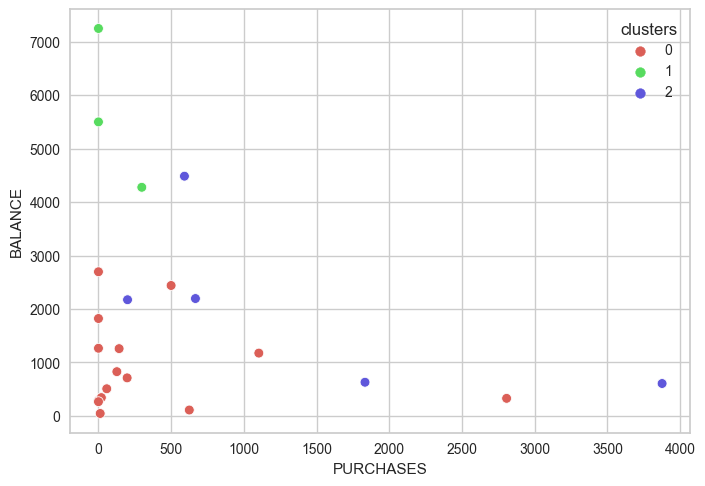

In [62]:
# visualize result clustering data inference 
sns.scatterplot(df_inf, x=df_inf['PURCHASES'], y=df_inf['BALANCE'], hue=df_inf['clusters'], s=50,palette=sns.color_palette('hls',df_inf['clusters'].nunique()))

1. Cluster 0 adalah Customer yang memiliki nilai saldo rendah hingga menengah dengan kebiasaan berbelanja cenderung rendah hingga menengah 
2. Cluster 1 adalah Customer yang memiliki saldo kartu kredit menegah hingga tinggi dengan kebiasaan berbelanja cenderung rendah - menengah
3. Cluster 2 adalah customer yang memiliki nilai saldo rendah hingga tinggi namun memiliki tingkat kebiasaan berbelanja yang tinggi

Hasil clustering pada data inference memiliki kesamaan pada cluster data pada EDA. namun terdapat banyak sekali noice data atau data tidak pada tempatnya hal ini terjadi dikarenakan distribusi data yang tidak normal atau skewed sehingga banyka data yang bertabrakan valuenya

# 10. Kesimpulan


## 10.1 Model Analysis

Dilakukan pencarian nilai n_clusters dengan melakukan elbow method dan shilloutte method, dari kedua metode tersebut didapatkan nilai n_clusters adalah 3.
Lalu dilakukan perbandingan cluster yang telah didapatkan dengan data PCA
Dari hasil visualisasi terhadap PCA didapatkan bahwa model KMeans dengan cluster:3 adalah model terbaik untuk mengelompokkan data pada dataset ini dibandingkan DBscan dan AgglomerativeClustering Hal ini dikarenakan KMeans melakukan kelompok data berdasarkan centroid, sehingga KMeans menjadi algoritma yang paling cocok terhadap PCA.

Meskipun menjadi algoritma yang terbaik, namun KMeans belum sempurna untuk melakukan clustering pada dataset ini, hal ini disebabkan pada data masi terdapat banyak outliers

## 10.2 Overall Analysis
1. Dari EDA dapat kita lihat bahwa hampir semua kolom memiliki distribusi tidak normal dan skewness yang sangat tinggi hal ini menyebabkan banyak sekali extreme outliers pada data

3. Pada Data Preprocessing dilakukan beberapa treatment pada data diantaranya adalah 
- Handling Missing Value pada kolom credit limit dan minimum payments
- Handling outlier dengan menggunakan winsorizer, namun data ttp saja skewed
- Scalling data
- Dan mencari nilai VIF disetiap feature untuk melihat tingkat multiolinearity, dari nilai VIF dapat kita lihat bahwa score VIF tertinggi terdapat pada kolom Purchases, OneOff_purchases, Balance dan installment purchases 
- Dilakukan reduksi dimensi dengan PCA, dan didapatkan 7 feature dari 17 feature yang tersedia

3. Dari hasil visualisasi terhadap PCA didapatkan bahwa model KMeans dengan cluster:3 sangat baik untuk mengelompokkan data dibandingkan DBscan dan AgglomerativeClustering Hal ini dikarenakan KMeans melakukan kelompok data berdasarkan centroid, sehingga KMeans menjadi algoritma yang paling cocok terhadap PCA

4. Clustering pada data inference memiliki kesamaan pada cluster data pada EDA. namun keduanya terdapat banyak sekali noice data atau data tidak pada tempatnya hal ini terjadi dikarenakan distribusi data yang tidak normal atau skewed sehingga banyka data yang bertabrakan valuenya

# Conceptual Problems
1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
Yang dimaksud dengan inertia cara untuk melihat seberapa besar jarak data pada setiap himpunan data. dengan mengukur jarak antara setiap titik data dan sentroidnya



2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !<br>
    - Metode Elbow merupakan salah satu metode untuk menentukan jumlah cluster yang tepat melalui dengan melihat K optimum yang akan membentuk siku pada suatu titik.<br>
    - Cara pemakaian : dengan cara membandingkan jumlah kluster dengan nilai inersianya. <br>
    - Kelebihan : Mudah untuk digunakan dan telah menjadi salah satu metode yang populer.<br>
    Kelemahan : Elbow Method hanya memberikan kemungkinan di mana titik jumlah cluster pada grafik, tetapi ini adalah metode yang sangat subyektif dan untuk beberapa data mungkin tidak berfungsi<br><br>



3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !
    - Pada KMeans adalah algoritma berbasis centroid, sehingga algoritma ini akan mencari centroid atau titik data tengah terlebih dahulu baru menghitung jarak rata-rata data terdekatnya untuk mendapatkan himpunan data sebagai cluster, pada algoritma KMeans sangat sensitif terhadap outlier
    - Pada DBScan merupakan algoritma yang berbasis kepadatan atau density dari data sekitarnya untuk membuat cluster, Jika terdapat outlier tidak akan berpengaruh pada DBScan karena outlier akan tidak dianggap jadi bagian dari cluster tertentu
    - AggloMerative clutering merupakan salah satu hierarical clustering atau bisa disebut dengan pohon cluster, biasanya algoritma ini membuat cluster dengan dendogram grafik, teknik AggloMerative adalah dengan cara bottom up yaitu menggabungkan n buah klaster menjadi satu klaster tunggal.